In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

2023-12-26 09:12:13.504483: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-26 09:12:15.950770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 09:12:15.950980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 09:12:16.165165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 09:12:16.902055: I tensorflow/core/platform/cpu_feature_guar

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

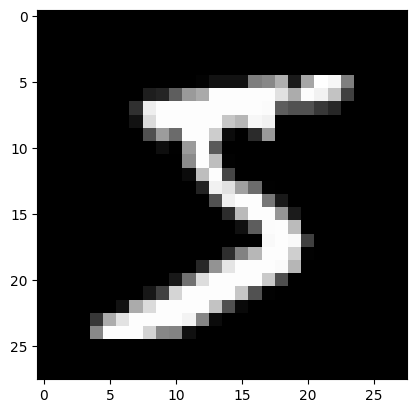

In [24]:
plt.imshow(x_train[0], cmap='gray')

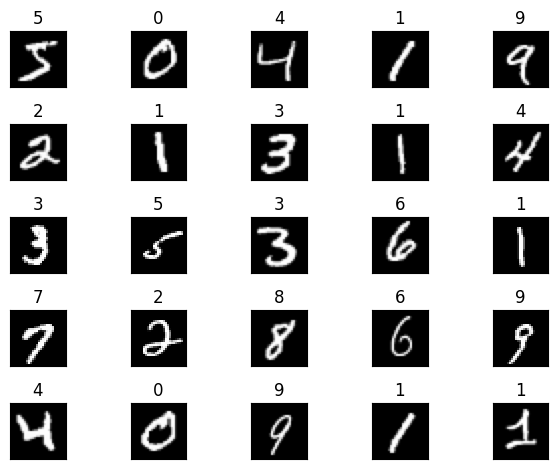

In [25]:
fig, ax = plt.subplots(5, 5)

# Flatten the axes array
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(y_train[i]))

# Adjust the spacing
fig.tight_layout()

# Show the plot
plt.show()


### Scale the data

In [27]:
x_train = x_train/255
x_test = x_test/255

### Flatten the data

In [28]:
x_train[0].shape

(28, 28)

In [30]:
x_train[0].size

784

In [31]:
size = x_train[0].size

In [33]:
x_train = x_train.reshape(-1, size)
x_test = x_test.reshape(-1, size)

In [34]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Prepare output variable

In [35]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Building the model

In [40]:
model = Sequential()

model.add(Dense(size, input_shape=(size, ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compiling model

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training model

In [42]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
6000/6000 [==============================] - 39s 6ms/step - loss: 0.1831 - accuracy: 0.9433
Epoch 2/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0884 - accuracy: 0.9732
Epoch 3/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0641 - accuracy: 0.9808
Epoch 4/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0508 - accuracy: 0.9843
Epoch 5/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0414 - accuracy: 0.9872
Epoch 6/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0358 - accuracy: 0.9896
Epoch 7/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 8/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0321 - accuracy: 0.9911
Epoch 9/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0274 - accuracy: 0.9929
Epoch 10/10
6000/6000 [==============================] - 36s 6ms/step - l

### Evaluating on test data

In [44]:
res = model.evaluate(x_test, y_test, batch_size=1)
print(f"Loss: {res[0]}")
print(f"Accuracy: {res[1]}")

10000/10000 [==============================] - 31s 3ms/step - loss: 0.1610 - accuracy: 0.9767
Loss: 0.16098660230636597
Accuracy: 0.9767000079154968


(784,)


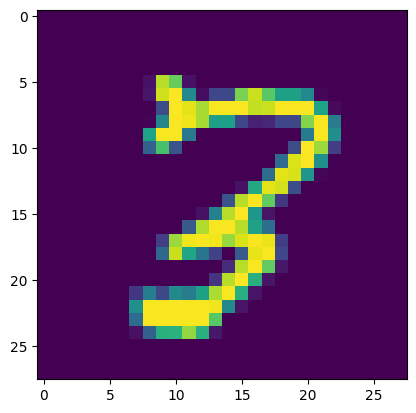

In [45]:
img = x_test[578]
print(img.shape)
plt.imshow(img.reshape(28, 28))

In [49]:
img = x_test[578].reshape(-1, 784)
img.shape

(1, 784)

In [51]:
preds = model.predict(img)
ans = np.argmax(preds, axis=1)
ans

1/1 [==============================] - 0s 24ms/step


array([3])